# K Nearest Neighbors with Python

The classified data set They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [15]:
df = pd.read_csv("Classified Data",index_col=0)

In [17]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
### Sample Example of Feature Scaling : Standardization and Normalization

<AxesSubplot:>

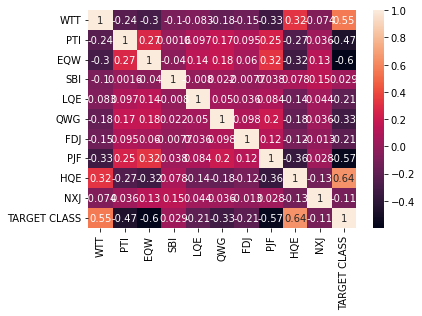

In [5]:
import seaborn as sns

sns.heatmap(df.corr(),annot=True)

In [3]:
# example of a standardization 
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([
[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])

#print(data)
# define standard scaler
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(data)

print(scaled)


[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


In [7]:
# example of a Normalization [0 - 1]
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define data
data = asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])


# define min max scaler
scaler = MinMaxScaler()

# transform data
scaled = scaler.fit_transform(data)

print(scaled)

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [12]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['TARGET CLASS'],
                                                    test_size=0.30)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)

In [20]:
pred[:5]

array([0, 1, 1, 1, 1])

## Predictions and Evaluations

Let's evaluate our KNN model!

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
print(confusion_matrix(y_test,pred))

[[136  20]
 [ 14 130]]


In [23]:
print(accuracy_score(y_test,pred))

0.8866666666666667


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       156
           1       0.87      0.90      0.88       144

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [25]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)


In [26]:
error_rate = []

# Will take some time
for i in range(1,50):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
            

In [27]:
#True 1
#False 0

In [28]:
print(error_rate)

[0.11333333333333333, 0.09333333333333334, 0.09333333333333334, 0.09, 0.1, 0.08, 0.09, 0.09333333333333334, 0.09333333333333334, 0.08, 0.08666666666666667, 0.08, 0.08333333333333333, 0.08, 0.08333333333333333, 0.07333333333333333, 0.07666666666666666, 0.07666666666666666, 0.08, 0.07666666666666666, 0.08, 0.07666666666666666, 0.08333333333333333, 0.08, 0.07333333333333333, 0.07, 0.07333333333333333, 0.07333333333333333, 0.07333333333333333, 0.06666666666666667, 0.07333333333333333, 0.06666666666666667, 0.07, 0.06666666666666667, 0.07, 0.06333333333333334, 0.06666666666666667, 0.06333333333333334, 0.07, 0.06666666666666667, 0.07333333333333333, 0.07333333333333333, 0.08, 0.07333333333333333, 0.07666666666666666, 0.07333333333333333, 0.07666666666666666, 0.07666666666666666, 0.07666666666666666]


In [29]:
# pred_i!=y_test --> return boolean value(True/False)
# Which are treated as 1 , 0 by np.mean

#np.mean((0+1+1+0)/4)

#checks if all the values in y_test is not equal to corresponding values in pred_i
#which either results in 0 or 1. 
#And then takes the mean of it.


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
y_test = [2,2,3]
y_pred = [2,2,1]
print(accuracy_score( y_test, y_pred))
print(np.mean(y_test!=y_pred))


0.6666666666666666
1.0


In [31]:
import numpy as np
np.mean([True, True, False])


0.6666666666666666

In [32]:
np.mean([1,1,0])

0.6666666666666666

In [33]:
1+1+0+0/4

2.0

In [34]:
np.mean([1,1,0,0])

0.5

Text(0, 0.5, 'Error Rate')

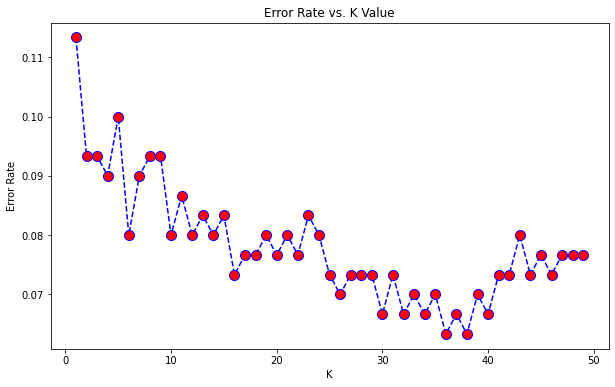

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [36]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))


# TP = When Actual is True and predicted is also True
# TN =When Actual is False and predicted is also False
# FP = When actual is Fasle and predicted is True
# FN = when actual is True and predicted is False

#CM when k=1
# [136  20]
# [ 14 130]]

WITH K=23


[[138  18]
 [  7 137]]


              precision    recall  f1-score   support

           0       0.95      0.88      0.92       156
           1       0.88      0.95      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.9166666666666666


In [40]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=37


[[139  17]
 [  4 140]]


              precision    recall  f1-score   support

           0       0.97      0.89      0.93       156
           1       0.89      0.97      0.93       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

0.93


In [38]:


knn.predict([[0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314]])


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [39]:
pred[:5]

array([0, 1, 1, 1, 1])

### Best Prepare Data for KNN

Rescale Data: KNN performs much better if all of the data has the same scale. Normalizing your data to the range [0, 1] is a good idea. It may also be a good idea to standardize your data if it has a Gaussian distribution.

Address Missing Data: Missing data will mean that the distance between samples can not be calculated. These samples could be excluded or the missing values could be imputed.

Lower Dimensionality: KNN is suited for lower dimensional data. You can try it on high dimensional data (hundreds or thousands of input variables) but be aware that it may not perform as well as other techniques. KNN can benefit from feature selection that reduces the dimensionality of the input feature space.
    

    